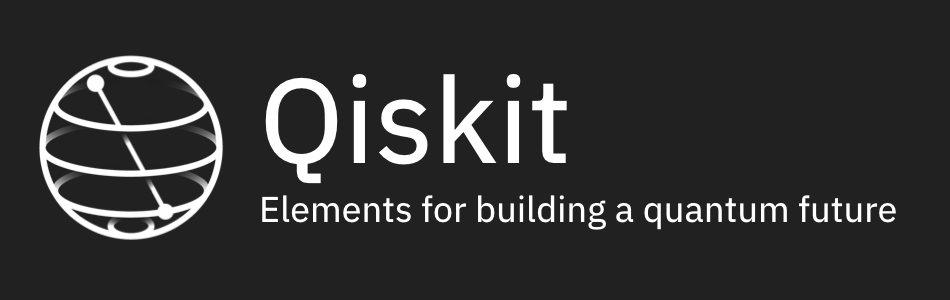

# Qiskit Chemistry, Declarative Approach

### Introduction

This notebook demonstrates how to use Qiskit Chemistry to compute the ground state energy of molecular Hydrogen (H$_2$) using the Variational Quantum Eigensolver (VQE) algorithm and the Unitary Coupled Cluster Singles and Doubles (UCCSD) variational form.  This notebook uses the so called *declarative approach*: a Python dictionary automatically generated via the Qiskit Chemistry GUI wizard summarizes the entire experiment declaratively.  That dictionary is simply then passed as a paramter to the `run` method of the `QiskitChemistry` solver to get the result of the experiment, also in the form of a Python dictionary.

Users who are more interested in learning the Qiskit Aqua and Qiskit Chemistry APIs and/or in contributing new algorithmic components can look at the same experiment executed [programmatically](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/chemistry/programmatic_approach.ipynb).

This notebook has been written to use the HDF5 chemistry driver. This driver uses molecular data that has been serialized from a prior computation.  This allows this notebook to be executed with no additional driver installation requirements. See the Qiskit Chemistry driver documentation for more detail.

First, we import `QiskitChemistry`, which is the object that will carry out the computation for us

In [1]:
from qiskit.chemistry import QiskitChemistry
from qiskit import Aer

Next, we create a Python dictionary to specify the problem we want to solve. There are defaults for many additional values that are not shown here for simplicity. Indeed, we take advantage of using sensible defaults that the Qiskit Chemistry stack provides.  As mentioned above, the Qiskit Chemistry GUI wizard allows for automatic extraction of the Python dictionary, reflecting the current configuration.  Once the Python dictionary has been extracted, it can be pasted into a Python program or a Jupyter Notebook and, if necessary, edited.

The first entry names a chemistry driver. This example uses HDF5 and the next line configures the driver for an `hdf5` file that contains data from a prior computation for an H$_2$ molecule with basis set `sto-3g`. The operator line would be automatically set by default, but we have added it here to show it and to emphasize where the problem input is converted into a quantum qubit form. We then indicate to the `QiskitChemistry` solver that the VQE algorithm should be used in this experiment, using the COBYLA optimizer with a UCCSD variational form and initial state of HartreeFock. VQE uses the variational method to find the minimum eigenvalue of a problem, which in this case is the ground state energy of the molecule.

### [Optional] Setup token to run the experiment on a real device
If you would like to run the experiment on a real device, you need to setup your account first.

Note: If you have not stored your token yet, use `IBMQ.save_account('MY_API_TOKEN')` to store it first.

In [2]:
# from qiskit import IBMQ
# provider = IBMQ.load_account()
# backend = provider.get_backend('ibmq_16_melbourne')

In [3]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')

In [4]:
# Input dictionary to configure Qiskit AQUA Chemistry for the chemistry problem.

qiskit_chemistry_dict = {
    'driver': {'name': 'HDF5'},
    'HDF5': {'hdf5_input': 'H2/0.7_sto-3g.hdf5'},
    'operator': {'name': 'hamiltonian'},
    'algorithm': {'name': 'VQE'},
    'optimizer': {'name': 'COBYLA'},
    'variational_form': {'name': 'UCCSD'},
    'initial_state': {'name': 'HartreeFock'}
}

We can now create an `QiskitChemistry` object and call `run` on it passing in the problem dictionary to get a result. This may take a short time and it will use a local quantum simulator to carry out the quantum computation that the VQE algorithm uses.

In [5]:
solver = QiskitChemistry()
result = solver.run(qiskit_chemistry_dict, backend=backend)

/Users/paul/opt/anaconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


The `run` method returns a result dictionary. Some notable fields include `energy`, which is the computed ground state energy. We can print it.

In [6]:
print('Ground state energy: {}'.format(result['energy']))

Ground state energy: -1.1361894404150168


There is also a `printable` field containing a complete ready to print readable result.

In [7]:
for line in result['printable']:
    print(line)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.892156884586
  - computed part:      -1.892156884586
  - frozen energy part: 0.0
  - particle hole part: 0.0
~ Nuclear repulsion energy (Hartree): 0.755967444171
> Total ground state energy (Hartree): -1.136189440415
  Measured:: Num particles: 2.000, S: 0.000, M: 0.00000
 
=== DIPOLE MOMENT ===
 
* Electronic dipole moment (a.u.): [0.0  0.0  -0.00015451]
  - computed part:      [0.0  0.0  -0.00015451]
  - frozen energy part: [0.0  0.0  0.0]
  - particle hole part: [0.0  0.0  0.0]
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
> Dipole moment (a.u.): [0.0  0.0  0.00015451]  Total: 0.00015451
               (debye): [0.0  0.0  0.00039272]  Total: 0.00039272


This was a very simple example showing how to get started. There are more elaborate notebooks here as well as documentation describing the various components and their configurations to help you to experiment with quantum computing and its application to solving chemistry problems.

In [8]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright